In [1]:
import pandas as pd
import numpy as np

In [2]:
 DataFrame = pd.read_csv('BankData.csv', sep = ",") #Cargamos el archivo

In [3]:
DataFrame

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,3418.0,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,3313.0,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,4003.0,1851,15476,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,4277.0,2186,8764,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,5409.0,0,10291,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,5281.0,0,8395,62


In [4]:
#https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
DataFrame.drop_duplicates(subset ="CLIENTNUM",
                     keep = False, inplace = True)

#Eliminamos las filas duplicadas, debido a que cada cliente debe tener un id unico.

In [5]:

#Es necesario saber si el dataframe tiene valores null, si fuese el caso verdadero, es necesario realizar
#una manipulacion previa.
DataFrame.isnull().values.any() 

False

In [6]:
#Nos permite saber si el dataframe tiene valores NA.
DataFrame.isna().values.any()

False

In [7]:
#Toca ahora transformar las columnas mediante One hot encoding, agregando más columnas, para no sesgar el 
#modelo


In [8]:
Education_LevelDummy = pd.get_dummies(DataFrame["Education_Level"], prefix="Education_Level")
Gender_Dummy = pd.get_dummies(DataFrame["Gender"], prefix="Gender")
Marital_StatusDummy = pd.get_dummies(DataFrame["Marital_Status"], prefix="Marital_Status")
Card_CategoryDummy = pd.get_dummies(DataFrame["Card_Category"], prefix="Card_Category")
Income_CategoryDummy = pd.get_dummies(DataFrame["Income_Category"], prefix="Income_Category")

In [9]:
#Concadenamos las variables dummy al dataframe original

In [10]:
DataFrame = pd.concat([DataFrame, Education_LevelDummy], axis=1)
DataFrame = pd.concat([DataFrame, Gender_Dummy], axis=1)
DataFrame = pd.concat([DataFrame, Marital_StatusDummy], axis=1)
DataFrame = pd.concat([DataFrame, Income_CategoryDummy], axis=1)
DataFrame = pd.concat([DataFrame, Card_CategoryDummy], axis=1)

In [11]:
DataFrame

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0,0,1,0,0,0,1,0,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0,0,0,0,1,0,1,0,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,0,0,1,0,0,1,0,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0,0,0,0,1,0,1,0,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0,1,0,0,0,0,1,0,0,0
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0,1,0,0,0,0,1,0,0,0
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,0,0,0,1,0,1,0,0,0
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,1,0,0,0,0,1,0,0,0


In [12]:
#Reemplazamos con valores binarios la variable Attrition_FLag, que es nuestra variable a predecir.

In [13]:
DataFrame["Attrition_Flag"] = DataFrame["Attrition_Flag"].replace({"Existing Customer": 0, "Attrited Customer": 1})

In [14]:
#Donde el valor 0 indica si el cliente sigue en el banco, 1 caso contrario.

In [15]:
DataFrame

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,0,1,0,0,0,0,1,0,0,0
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0,1,0,0,0,0,1,0,0,0
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,0,0,0,1,0,1,0,0,0
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,1,0,0,0,0,1,0,0,0


In [16]:
#Ahora bien, una vez que transformmamos las variables a OHE y binaria respectivamente, es necesario quitar
#las columnas transformadas por OHE, además de eliminar la variable ClientNum

In [17]:
DataFrame.drop(['CLIENTNUM','Gender','Education_Level','Marital_Status','Income_Category','Card_Category'], axis = 1, inplace = True)

In [18]:
#Observamos que este todo en el dataframe.
DataFrame

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,12691.0,777,1144,42,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,8256.0,864,1291,33,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,3418.0,0,1887,20,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,3313.0,2517,1171,20,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,4716.0,0,816,28,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,4003.0,1851,15476,117,...,0,1,0,0,0,0,1,0,0,0
10123,1,41,2,25,4,2,4277.0,2186,8764,69,...,0,1,0,0,0,0,1,0,0,0
10124,1,44,1,36,5,3,5409.0,0,10291,60,...,0,0,0,0,1,0,1,0,0,0
10125,1,30,2,36,4,3,5281.0,0,8395,62,...,0,1,0,0,0,0,1,0,0,0


In [19]:
#Para el proceso de seleccion de variables, utilizamos la libreria featurewiz, que mediante el algoritmo
#de SULOV y usando XGboost de manera recursa nos permite identificar las variables más significativas
#a la hora de entrenar un modelo, para posteriormente realizar las conclusiones pertinentes.

#Fuente:https://hackernoon.com/automatic-feature-selection-in-python-an-essential-guide-uv3e37mk

Imported version = 0.1.83.
from featurewiz import FeatureWiz
wiz = FeatureWiz(verbose=1)
X_train_selected = wiz.fit_transform(X_train, y_train)
X_test_selected = wiz.transform(X_test)
wiz.features  ### provides a list of selected features ###
                                
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (10127, 33)
    Loaded train data. Shape = (10127, 33)
    Some column names had special characters wh

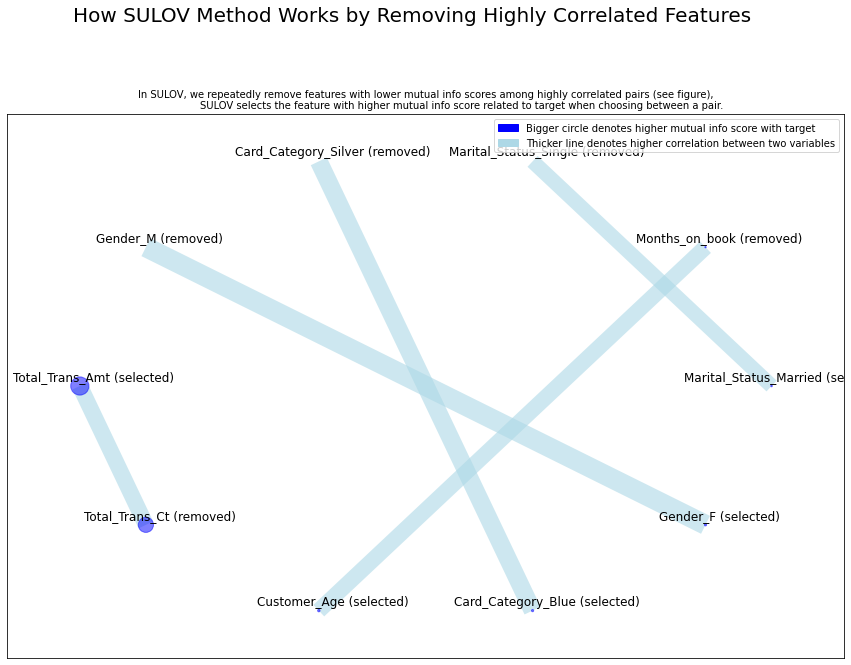

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 27
Final list of selected vars after SULOV = 27
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 27 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 27 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 22 variables...
            Time taken for regular XGBoost feature selection = 1 seconds
        using 17 variables...
            Time taken for regular XGBoost feature selection

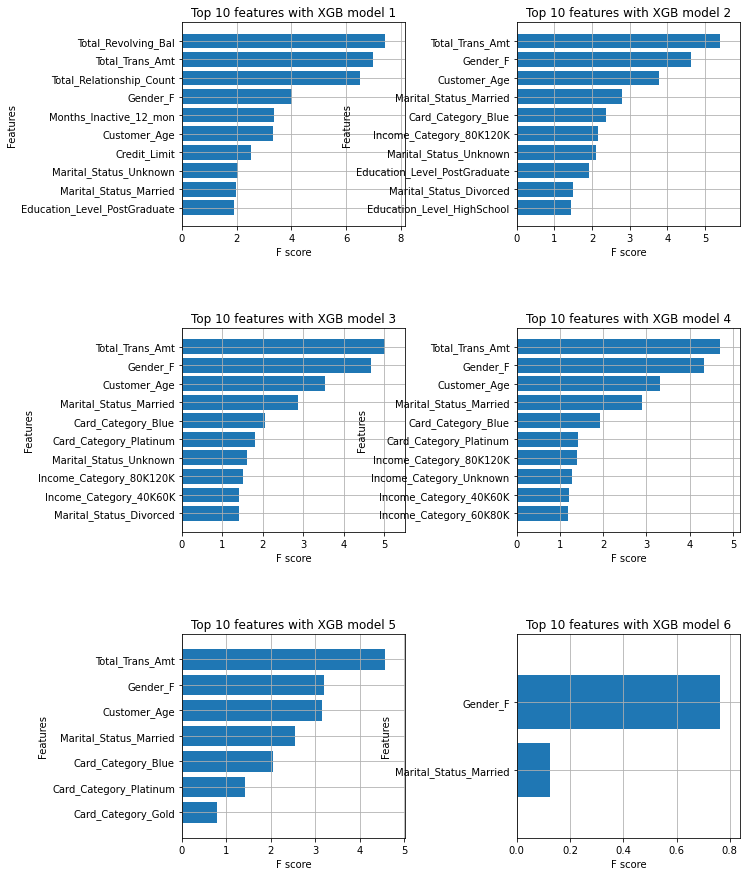

            Total time taken for XGBoost feature selection = 4 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 19 important features:
['Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Relationship_Count', 'Gender_F', 'Months_Inactive_12_mon', 'Customer_Age', 'Credit_Limit', 'Marital_Status_Unknown', 'Marital_Status_Married', 'Education_Level_PostGraduate', 'Card_Category_Blue', 'Income_Category_80K120K', 'Marital_Status_Divorced', 'Education_Level_HighSchool', 'Card_Category_Platinum', 'Income_Category_40K60K', 'Income_Category_Unknown', 'Income_Category_60K80K', 'Card_Category_Gold']

    Time taken for feature selection = 5 seconds
Returning 2 dataframes: dataname and test_data with 19 important features.
['Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_

In [20]:
# automatic feature selection by using featurewiz package
from featurewiz import featurewiz
np.random.seed(1234) #Es necesario una semilla inicial para iniciar el algoritmo
target = 'Attrition_Flag' #Nuestra variable a predecir.
 
features, train = featurewiz(DataFrame, target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

print(features)

In [21]:
#Podemos notar la seleccion de variables y los distintos f score, por cada una de las distintas selecciones
#de features.

In [22]:
#Para entrenar a nuestro modelo, utilizaremos las variables recomendadas por la libreria.

In [23]:
#Copiamos nuestro modelo original

In [24]:
Data1 = DataFrame[['Attrition_Flag','Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Relationship_Count', 'Gender_F', 'Months_Inactive_12_mon', 'Customer_Age', 'Credit_Limit', 'Marital_Status_Unknown', 'Marital_Status_Married', 'Education_Level_Post-Graduate', 'Card_Category_Blue', 'Income_Category_$80K - $120K', 'Marital_Status_Divorced', 'Education_Level_High School', 'Card_Category_Platinum', 'Income_Category_$40K - $60K', 'Income_Category_Unknown', 'Income_Category_$60K - $80K', 'Card_Category_Gold']]

In [25]:
Data1

,Attrition_Flag,Total_Revolving_Bal,Total_Trans_Amt,Total_Relationship_Count,Gender_F,Months_Inactive_12_mon,Customer_Age,Credit_Limit,Marital_Status_Unknown,Marital_Status_Married,Education_Level_Post-Graduate,Card_Category_Blue,Income_Category_$80K - $120K,Marital_Status_Divorced,Education_Level_High School,Card_Category_Platinum,Income_Category_$40K - $60K,Income_Category_Unknown,Income_Category_$60K - $80K,Card_Category_Gold
0,0,777,1144,5,0,1,45,12691.0,0,1,0,1,0,0,1,0,0,0,1,0
1,0,864,1291,6,1,1,49,8256.0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1887,4,0,1,51,3418.0,0,1,0,1,1,0,0,0,0,0,0,0
3,0,2517,1171,3,1,4,40,3313.0,1,0,0,1,0,0,1,0,0,0,0,0
4,0,0,816,5,0,1,40,4716.0,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,1851,15476,3,0,2,50,4003.0,0,0,0,1,0,0,0,0,1,0,0,0
10123,1,2186,8764,4,0,2,41,4277.0,0,0,0,1,0,1,0,0,1,0,0,0
10124,1,0,10291,5,1,3,44,5409.0,0,1,0,1,0,0,1,0,0,0,0,0
10125,1,0,8395,4,0,3,30,5281.0,1,0,0,1,0,0,0,0,1,0,0,0


In [26]:
#Realizamos los ajutes previos al entrenamiento y reducción de dimensionalidad correspondiente
from sklearn.model_selection import train_test_split
X = Data1.drop(["Attrition_Flag"],axis = 1) #todas nuestras variables independientes
y = Data1.Attrition_Flag  #nuestra variable dependiente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0) #70-30% de entrenamiento

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #escalamos los datos, debido a que las columnas tienen distintas métricas.
X_train = sc.fit_transform(X_train) #lo aplicamos para x_Train
X_test = sc.transform(X_test) #lo aplicamos para x_test

In [28]:
from sklearn.decomposition import PCA #Importamos PCA para realizar la reduccion de dimensionalidad
pca = PCA(n_components = 2) #seleccionamos dos componentes
X_train = pca.fit_transform(X_train) #aplicamos la transformación
X_test = pca.transform(X_test)

In [29]:
X_train #Podemos observar los valores de nuestra reducción de dimensión.

array([[ 1.40206797, -1.17196709],
       [ 1.32092543, -0.32456776],
       [-1.15682276, -0.09511573],
       ...,
       [ 0.95270004, -1.38014921],
       [ 2.40545745,  0.35828507],
       [-1.25214063, -0.26388015]])

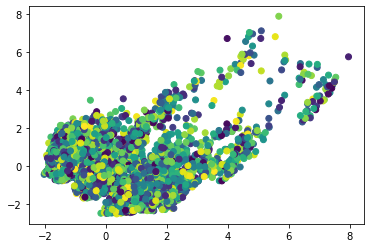

In [30]:
#Procedemos a realizar el scatterplot.
import matplotlib.pyplot as plt 
# from matplotlib import pyplot as plt

colors = np.random.rand(7088) #número salio de un error.

plt.scatter(X_train[:, 0], X_train[:, 1],c=colors)
plt.show()


In [31]:
pca.explained_variance_ratio_

array([0.11960082, 0.08538681])

In [32]:
#Utilizaremos RandomForest para entrenar el modelo, utilizaremos 5000 arboles como máximo y como 
#minimo 4 hojas, para este primer entrenamiento.
#Fuente: modelos.ipynb
from sklearn.ensemble import RandomForestClassifier
RandomForest1= RandomForestClassifier(n_estimators = 5000, 
                                  min_samples_leaf = 4)

In [33]:
RandomForest1.fit(X_train, y_train) #Entrenamos el modelo.

RandomForestClassifier(min_samples_leaf=4, n_estimators=5000)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2583
           1       0.40      0.07      0.11       456

    accuracy                           0.85      3039
   macro avg       0.63      0.52      0.51      3039
weighted avg       0.79      0.85      0.79      3039



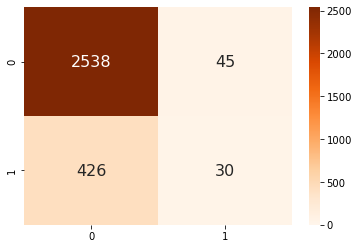

In [35]:
#Procedemos a mostrar los resultados con una matriz de confusion
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, RandomForest1.predict(X_test)) 
sns.heatmap(cm,cmap="Oranges", vmin=0, annot=True,annot_kws={"size": 16}, fmt='g');# font size
from sklearn.metrics import classification_report
print(classification_report(y_test, RandomForest1.predict(X_test)))

In [36]:
#Fuente: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/#:~:text=ROC%20Curves%20and%20AUC%20in%20Python,-We%20can%20plot&text=The%20AUC%20for%20the%20ROC,probabilities%20for%20the%201%20class.
#Modelos.ipynb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = RandomForest1.predict_proba(X_test)
lr_probs = lr_probs[:,1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('AUC: %.2f' % lr_auc) #Area bajo la curva.

AUC: 0.61


In [ ]:
#Modelo 2 ##################################################

In [37]:
Data2 = DataFrame

In [38]:
Data2

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,12691.0,777,1144,42,...,0,0,1,0,0,0,1,0,0,0
1,0,49,5,44,6,1,8256.0,864,1291,33,...,0,0,0,0,1,0,1,0,0,0
2,0,51,3,36,4,1,3418.0,0,1887,20,...,0,0,0,1,0,0,1,0,0,0
3,0,40,4,34,3,4,3313.0,2517,1171,20,...,0,0,0,0,1,0,1,0,0,0
4,0,40,3,21,5,1,4716.0,0,816,28,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,4003.0,1851,15476,117,...,0,1,0,0,0,0,1,0,0,0
10123,1,41,2,25,4,2,4277.0,2186,8764,69,...,0,1,0,0,0,0,1,0,0,0
10124,1,44,1,36,5,3,5409.0,0,10291,60,...,0,0,0,0,1,0,1,0,0,0
10125,1,30,2,36,4,3,5281.0,0,8395,62,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
#En este caso, vamos a utilizar todas las variables para entrenar el modelo, con el fin de comprobar
#de manera empirica que tan útil fue la utilización de la libreria featurewiz, comparando el f1 score y 
#Accuracy correspondiente

In [39]:
#Realizamos los ajutes previos al entrenamiento y reducción de dimensionalidad correspondiente
from sklearn.model_selection import train_test_split
X2 = Data2.drop(["Attrition_Flag"],axis = 1) #todas nuestras variables independientes
y2 = Data2.Attrition_Flag  #nuestra variable dependiente
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3,random_state=0) #70-30% de entrenamiento

In [40]:
#Procedemos a trabajar la reducción de dimensionalidad con TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

X_2D = tsne.fit_transform(Data2)

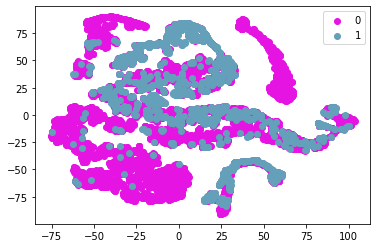

In [41]:
#Gráficamos.

cmap_bold = [ '#e614e3', '#64a0b9']

plt.scatter(X_2D[y==0, 0], X_2D[y==0, 1], c=cmap_bold[0], label='0')
plt.scatter(X_2D[y==1, 0], X_2D[y==1, 1], c=cmap_bold[1], label='1')
plt.legend()

plt.show()

In [ ]:
#Procedemos a mejorar entrenar este subconjunto nuevo, esta vez con otros parametros de randomForest

In [42]:
from sklearn.ensemble import RandomForestClassifier
RandomForest2= RandomForestClassifier(n_estimators = 4000, 
                                  min_samples_leaf = 2,
                                  max_depth=5,
                                     bootstrap=True,
                            oob_score=True, random_state=43)

In [44]:
RandomForest2.fit(X2_train, y2_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=4000,
                       oob_score=True, random_state=43)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2583
           1       0.95      0.40      0.57       456

    accuracy                           0.91      3039
   macro avg       0.93      0.70      0.76      3039
weighted avg       0.91      0.91      0.89      3039



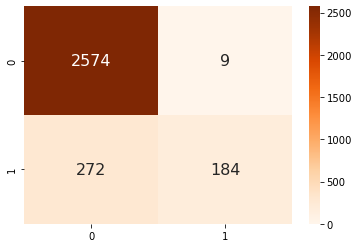

In [45]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, RandomForest2.predict(X2_test)) 
sns.heatmap(cm,cmap="Oranges", vmin=0, annot=True,annot_kws={"size": 16}, fmt='g');# font size
from sklearn.metrics import classification_report
print(classification_report(y2_test, RandomForest2.predict(X2_test)))

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

lr_probs = RandomForest2.predict_proba(X2_test)
lr_probs = lr_probs[:,1]
lr_auc = roc_auc_score(y2_test, lr_probs)
print('AUC: %.2f' % lr_auc) #Area bajo la curva.

AUC: 0.96
